# OrionKL test with method 2

In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np
#np.seterr(over='ignore')
import scipy as sp

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v2 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
#import aplpy
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

#from pycupid import *

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

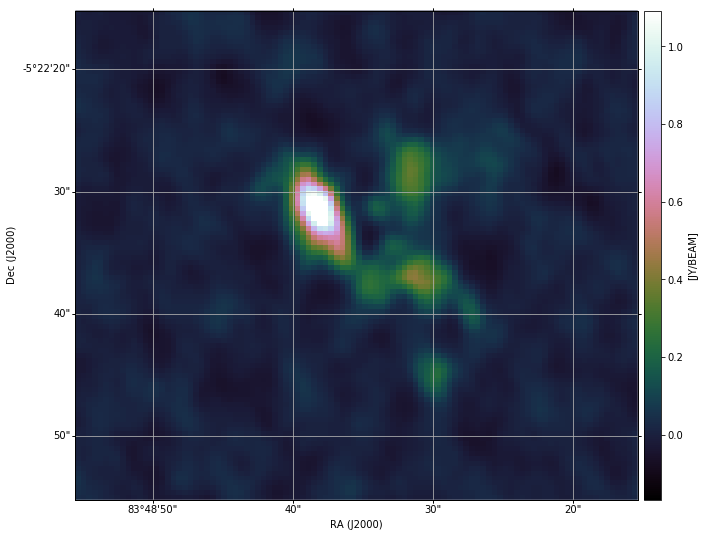

In [2]:
fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
#fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data, wcs, hdu = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"])

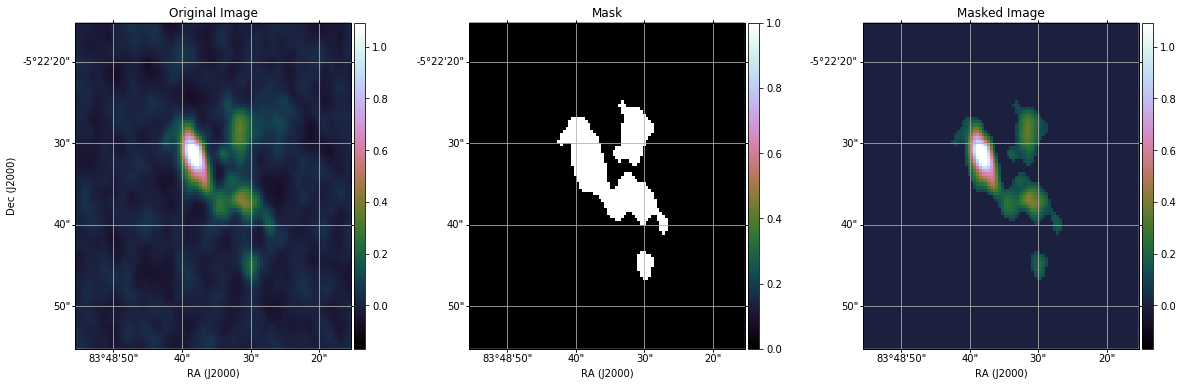

back_level:  0.10237737624469602


In [3]:
preprocessing(data, wcs)

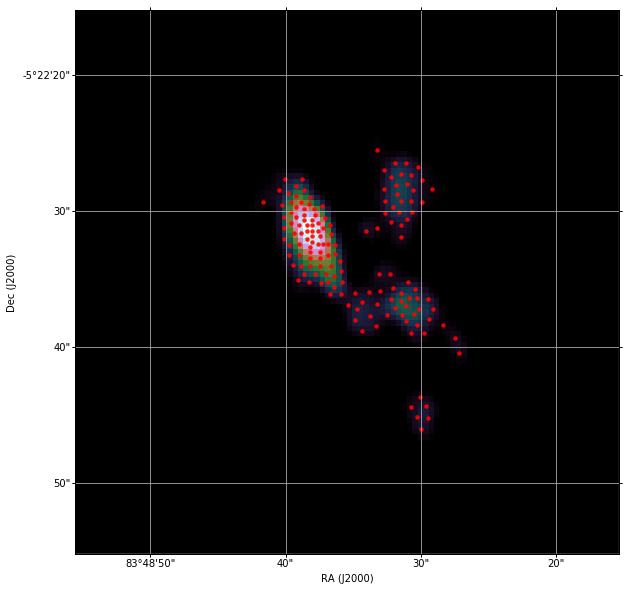

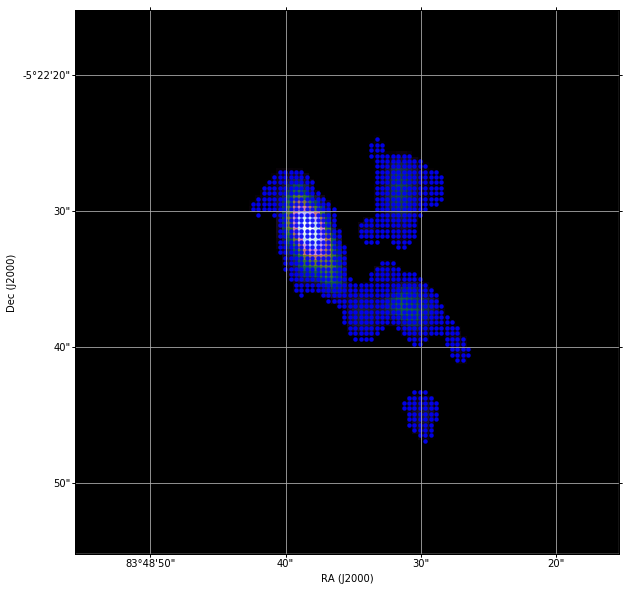

In [4]:
hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=True, n_center=150)

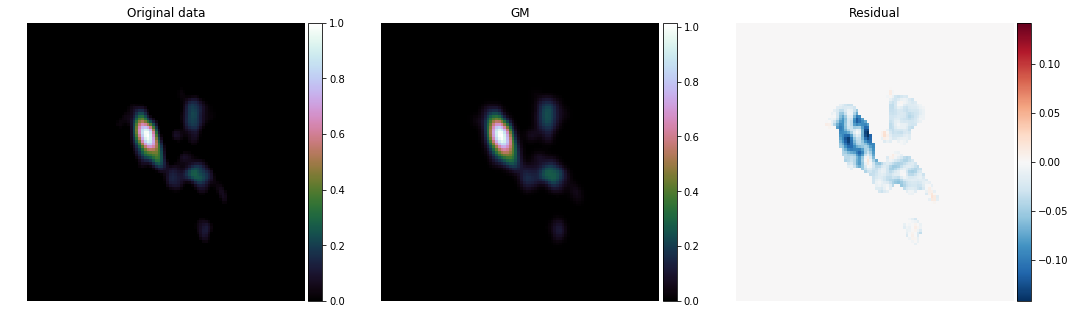

RESIDUAL STATS
RMS of residual: 0.012018783884204146
Inf norm of residual: 0.14208162514039588
Variance of residual: 0.0001386753068227681
Normalized flux addition: 0.21802613987991518
Normalized flux lost: 0.003207250083011733


In [5]:
hdmc.get_residual_stats();

In [8]:
%%prun -s tottime -q -l 30 -T hdmc_m2_prof
hdmc.build_gmr()

 
*** Profile printout saved to text file 'hdmc_m2_prof'. 


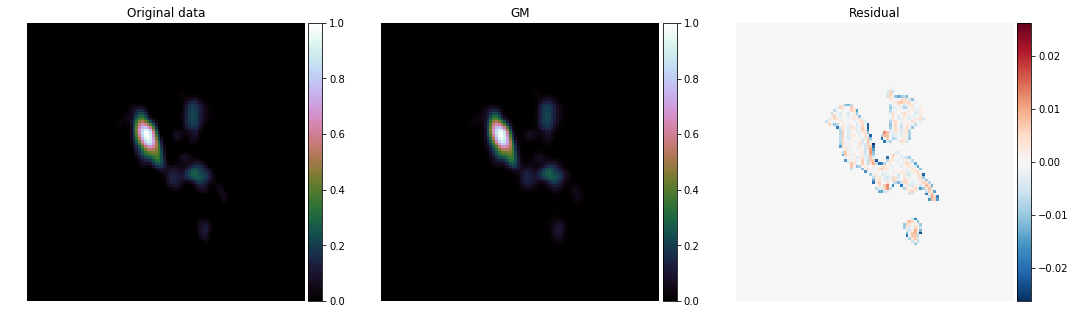

RESIDUAL STATS
RMS of residual: 0.0016000631922963022
Inf norm of residual: 0.026276023948520695
Variance of residual: 2.5540112717849776e-06
Normalized flux addition: 0.017202875864102386
Normalized flux lost: 0.010169841648666064


In [9]:
hdmc.get_residual_stats();

In [10]:
hdmc.solver_output()

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120200.
nfev: 120225
xtol: 1e-07
ftol: 1e-07


In [11]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 459.9965469837189


In [12]:
w,sig,theta = hdmc.get_params_mapped()

print("PARAMETERS VARIATION:")
print("w variation: ",np.max(np.abs(hdmc.w0-w)))
print("sig variation: ",np.max(np.abs(hdmc.sig0-sig)))
print("theta variation: ",np.max(np.abs(hdmc.theta0-theta)))

PARAMETERS VARIATION:
w variation:  0.1252236961299809
sig variation:  0.02848519874324441
theta variation:  6.277833316113334


In [13]:
w,sig,theta = hdmc.get_params_mapped()

#### Profiling results

In [14]:
print(open('hdmc_m2_prof', 'r').read())

         8781386 function calls (8779174 primitive calls) in 459.996 seconds

   Ordered by: internal time
   List reduced from 155 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   120227  374.493    0.003  374.493    0.003 {fgm_eval.gm_eval_full_thread}
        1   51.142   51.142  459.979  459.979 {built-in method scipy.optimize._minpack._lmdif}
   360681    8.535    0.000   16.642    0.000 necompiler.py:750(evaluate)
   120227    6.503    0.000   11.016    0.000 hdmclouds_v2.py:36(d1psi1)
   120227    3.588    0.000  408.854    0.003 hdmclouds_v2.py:361(F)
   120227    3.311    0.000    3.311    0.000 utils.py:139(sig_mapping)
   120227    2.324    0.000    2.324    0.000 {fgm_eval.gm_eval_full}
   360684    2.202    0.000    2.794    0.000 necompiler.py:534(getContext)
   360681    1.982    0.000    3.167    0.000 necompiler.py:725(getArguments)
   120227    0.790    0.000    0.790    0.000 utils.py:142(theta_mapping)
   3606

***
***

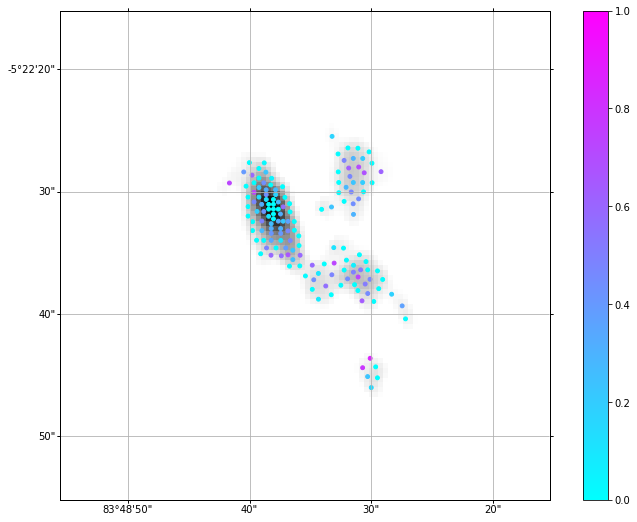

In [56]:
eccentricity_plot(hdmc.data, hdmc.xc, hdmc.yc, hdmc.get_params_mapped()[1], wcs=wcs)